<a href="https://colab.research.google.com/github/opinner/Articles/blob/main/Articles/Plotting_Southern_Ocean_Climate_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Southern Ocean Climate Modes

In this notebook, we will load and plot 3 Southern Ocean climate modes, namely SAM, ONI and SEI.

> This article can also be found at my [personal github page](https://github.com/opinner/Articles/blob/main/Articles/Plotting_Southern_Ocean_Climate_Modes.ipynb) or as an [interactive version on google colab](https://colab.research.google.com/drive/1vPscdVEqVclASeaw2vGLARQ8PsGlaFDW?usp=sharing). \
[*Ole Pinner*](https://www.awi.de/en/about-us/organisation/staff/single-view/ole-pinner.html)

We start with the imports, we need.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

## **Southern Hemisphere Annular Mode**, short **SAM**
Load Data from [data source](https://legacy.bas.ac.uk/met/gjma/sam.html)

In [ ]:
url ='http://www.nerc-bas.ac.uk/public/icd/gjma/newsam.1957.2007.txt'
SAM_df = pd.read_csv(url, header=0, index_col = 0, sep = '\s+')
SAM_df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1957,-0.87,-2.27,0.07,-1.97,-2.50,-0.87,1.00,-1.73,0.72,-3.12,-5.42,-2.63
1958,0.04,-2.84,-2.52,-0.30,-2.72,-0.97,-1.65,0.97,1.90,-0.16,0.30,0.82
1959,1.59,-0.19,-0.54,-1.25,-0.32,-1.12,0.18,-1.64,2.46,-0.46,3.28,-0.38
1960,0.90,0.85,3.40,-0.35,-0.60,-0.17,0.31,0.43,1.41,-1.17,1.18,1.36
1961,0.91,-4.00,-0.40,-0.14,1.12,-0.40,0.98,1.10,-1.21,1.64,1.52,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2.79,-1.87,1.47,0.86,-0.11,2.21,-2.20,-2.04,0.81,-1.97,-4.42,-1.78
2020,0.57,-0.36,2.05,-1.72,1.03,1.18,-0.97,-2.20,-0.25,1.79,1.14,2.28
2021,1.95,2.19,-0.95,0.87,0.75,1.88,-1.06,0.73,1.68,0.80,2.69,2.74
2022,2.19,1.92,1.28,2.49,0.25,-2.34,1.24,0.66,2.25,1.71,3.71,2.94


In [ ]:
# Reshape the DataFrame to have all months consecutively
SAM_df_stacked = SAM_df.stack().reset_index()
SAM_df_stacked.columns = ['Year', 'Month', 'SAM Value']
#combine year and month to a datetime object, timestamped in the middle of each month
SAM_df_stacked["time"] = pd.to_datetime(SAM_df_stacked['Year'].astype(str) + " " + SAM_df_stacked['Month']) + pd.offsets.DateOffset(days=14)
SAM_df_stacked.set_index('time', inplace= True) #set time as new index
SAM_df_stacked.drop(labels = ['Year', 'Month'], axis = 'columns', inplace = True) #drop now irrelevant columns
SAM_df_stacked.head()

,SAM Value
time,
1957-01-15,-0.87
1957-02-15,-2.27
1957-03-15,0.07
1957-04-15,-1.97
1957-05-15,-2.50


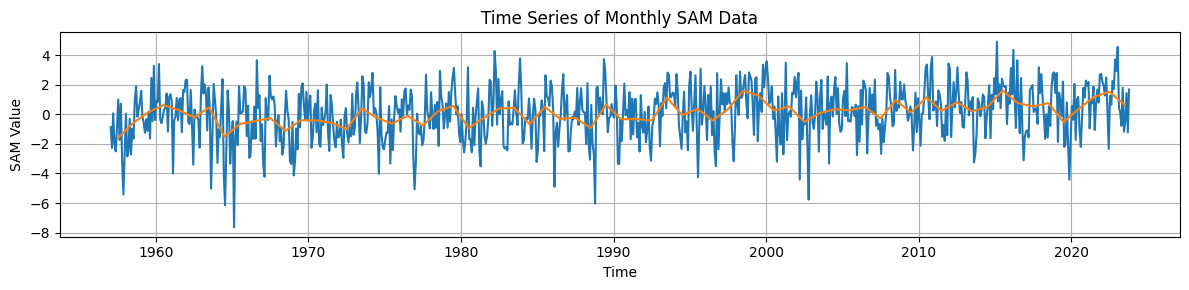

In [ ]:
fig, ax = plt.subplots(figsize = (12,3))
# Plot the time series
ax.plot(SAM_df_stacked.index, SAM_df_stacked['SAM Value']) #SAM value of every month
ax.plot(pd.to_datetime(SAM_df.index, format='%Y') + pd.offsets.DateOffset(months=6),SAM_df.mean(axis = 'columns')) #yearly average, timestamped in the middle of each year
# Customize the plot
ax.grid()
ax.set_title('Time Series of Monthly SAM Data')
ax.set_xlabel('Time')
ax.set_ylabel(SAM_df_stacked['SAM Value'].name)
fig.tight_layout()

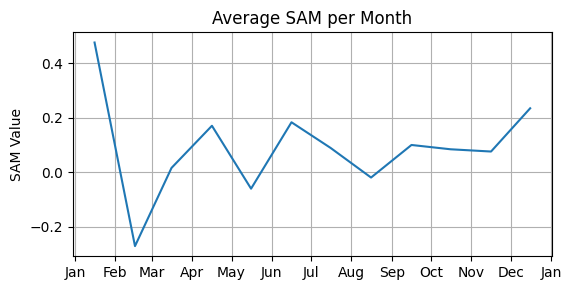

In [ ]:
fig, ax = plt.subplots(figsize = (6,3))
# Plot the time series
ax.plot(pd.to_datetime(SAM_df.columns, format = "%b") + pd.offsets.DateOffset(days=14),SAM_df.mean(axis = 'rows')) #monthly average across time, timestamped in the middle of each month
# Customize the plot
ax.grid()
ax.set_title('Average SAM per Month')
#ax.set_xlabel('Time')
ax.set_ylabel('SAM Value')
fig.tight_layout()

# Format x-axis to display only the month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

## **Oceanic Niño Index**, short **ONI**
Load Data from [data source](https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php)

I did not find a direct download of the data and instead copied it to a csv.

<font size="2">
It is not immediately obvious how to create direct download links in nextcloud, but you can turn on link sharing, open the download link in another tab and copy the link of the button *download*. More info will exceed the scop of this little tutorial.
</font>



In [ ]:
# download bathymetry sample data
url = 'https://nextcloud.awi.de/s/kgnQpwzxynyEzzW/download/ONI_data_cleaned.csv'
ONI_df = pd.read_csv(url, header=0, index_col = 0, sep = ",")
ONI_df

,DJF,JFM,FMA,MAM,AMJ,MJJ,JJA,JAS,ASO,SON,OND,NDJ
Year,,,,,,,,,,,,
1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.7,0.7,0.7,0.7,0.5,0.5,0.3,0.1,0.2,0.3,0.5,0.5
2020,0.5,0.5,0.4,0.2,-0.1,-0.3,-0.4,-0.6,-0.9,-1.2,-1.3,-1.2
2021,-1.0,-0.9,-0.8,-0.7,-0.5,-0.4,-0.4,-0.5,-0.7,-0.8,-1.0,-1.0


The rows as the year are easy to work with. But the columns are not so easy. They are a 3 month running mean, but if we don"t forget this smoothing we can replace them with the abreviated monthly names as in the data before.

In [ ]:
# Get the list of abbreviated month names
abbreviated_month_names = calendar.month_abbr[1:]
# Rename all columns
ONI_df.columns = abbreviated_month_names

In [ ]:
ONI_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1950,-1.5,-1.3,-1.2,-1.2,-1.1,-0.9,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8
1951,-0.8,-0.5,-0.2,0.2,0.4,0.6,0.7,0.9,1.0,1.2,1.0,0.8
1952,0.5,0.4,0.3,0.3,0.2,0.0,-0.1,0.0,0.2,0.1,0.0,0.1
1953,0.4,0.6,0.6,0.7,0.8,0.8,0.7,0.7,0.8,0.8,0.8,0.8
1954,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7


Now we can do the same things as before

In [ ]:
# Reshape the DataFrame to have all months consecutively
ONI_df_stacked = ONI_df.stack().reset_index()
ONI_df_stacked.columns = ['Year', 'Month', 'ONI Value']
# combine year and month to a datetime object, timestamped in the middle of each month
ONI_df_stacked["time"] = pd.to_datetime(ONI_df_stacked['Year'].astype(str) + " " + ONI_df_stacked['Month']) + pd.offsets.DateOffset(days=14)
ONI_df_stacked.set_index('time', inplace= True) #set time as new index
ONI_df_stacked.drop(labels = ['Year', 'Month'], axis = 'columns', inplace = True) #drop now irrelevant columns
ONI_df_stacked.head()

,ONI Value
time,
1950-01-15,-1.5
1950-02-15,-1.3
1950-03-15,-1.2
1950-04-15,-1.2
1950-05-15,-1.1


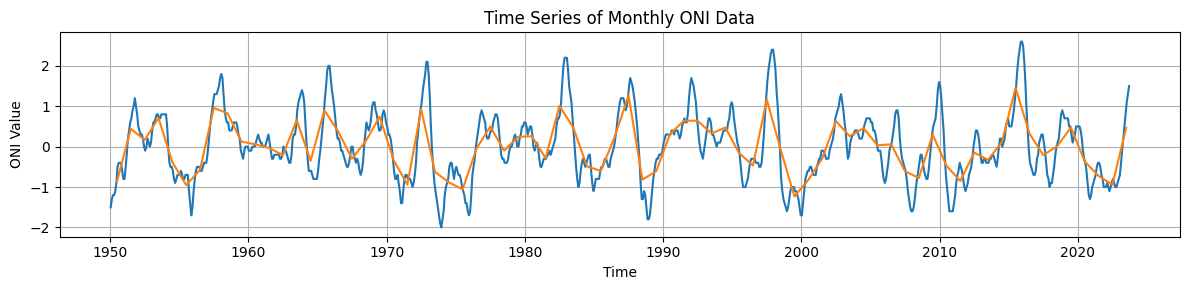

In [ ]:
fig, ax = plt.subplots(figsize = (12,3))
# Plot the time series
ax.plot(ONI_df_stacked.index, ONI_df_stacked['ONI Value']) #ONI value of every month
ax.plot(pd.to_datetime(ONI_df.index, format='%Y') + pd.offsets.DateOffset(months=6),ONI_df.mean(axis = 'columns')) #yearly average, timestamped in the middle of each year
# Customize the plot
ax.grid()
ax.set_title('Time Series of Monthly ONI Data')
ax.set_xlabel('Time')
ax.set_ylabel(ONI_df_stacked['ONI Value'].name)
fig.tight_layout()

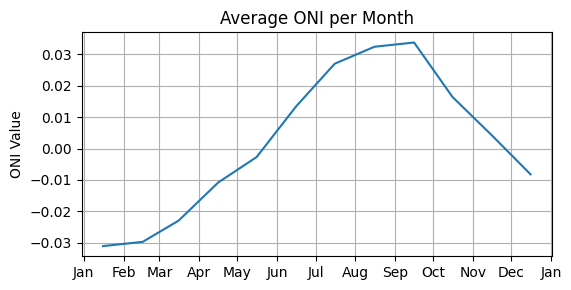

In [ ]:
fig, ax = plt.subplots(figsize = (6,3))
# Plot the time series
ax.plot(pd.to_datetime(ONI_df.columns, format = "%b") + pd.offsets.DateOffset(days=14),ONI_df.mean(axis = 'rows')) #monthly average across time, timestamped in the middle of each month
# Customize the plot
ax.grid()
ax.set_title('Average ONI per Month')
#ax.set_xlabel('Time')
ax.set_ylabel('ONI Value')
fig.tight_layout()

# Format x-axis to display only the month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

## **SAM-ENSO Index**, short **SEI**

The SAM-ENSO climate index (SEI) combines the Southern Anular Mode (SAM) index  with the Oceanic Niño Index (ONI), taking into account that their opposing phases reinforce each other in their overlapping effects on the wind field around Antarctica
\begin{equation}
SEI = {SAM \over std(SAM)} - {ONI \over std(ONI)}
\end{equation}
The SEI has been first employed in [Llanillo et al. (2023)](https://zenodo.org/records/7500163) .

We can compute the SEI index from the data above. The indices has to be the same (the year and the 15th of each month) to calculate a difference. As the time series don't start in the same year, we get NaN for some years, which we will drop.  

In [ ]:
SEI_df_stacked = SAM_df_stacked['SAM Value']/SAM_df_stacked['SAM Value'].std() - ONI_df_stacked['ONI Value']/ONI_df_stacked['ONI Value'].std()
SEI_df_stacked = pd.DataFrame(SEI_df_stacked)
SEI_df_stacked.rename(columns={0 :'SEI Value'}, inplace=True )
SEI_df_stacked.dropna(inplace=True)
SEI_df_stacked.head()

,SEI Value
time,
1957-01-15,-0.244839
1957-02-15,-1.387588
1957-03-15,-0.442563
1957-04-15,-1.942578
1957-05-15,-2.479259


We can also read in the SEI index directly, instead of calculating it ourselves

In [ ]:
url = 'https://zenodo.org/records/7500163/files/SEI.xlsx'
SEI_df_Pedro = pd.read_excel(url) #, header=0, index_col = 0, encoding='latin-1', on_bad_lines='skip')
SEI_df_Pedro["time"] = pd.to_datetime(SEI_df_Pedro["Dates"])
SEI_df_Pedro.drop(labels = ['Dates'], axis = 'columns', inplace = True)
SEI_df_Pedro.set_index('time', inplace= True) #set time as new index
SEI_df_Pedro.rename(columns={"SEI" :'SEI Value Pedro'}, inplace=True )
SEI_df_Pedro.head()

,SEI Value Pedro
time,
1957-01-15,-0.188266
1957-02-15,-1.339834
1957-03-15,-0.449349
1957-04-15,-1.958513
1957-05-15,-2.492922


In [ ]:
# combine both data frames
SEI_df_all_stacked = pd.merge(SEI_df_stacked, SEI_df_Pedro, left_index=True, right_index=True, how='outer')
SEI_df_all_stacked.head()

,SEI Value,SEI Value Pedro
time,,
1957-01-15,-0.244839,-0.188266
1957-02-15,-1.387588,-1.339834
1957-03-15,-0.442563,-0.449349
1957-04-15,-1.942578,-1.958513
1957-05-15,-2.479259,-2.492922


As a sanity check, we can compare both results

In [ ]:
SEI_df_all_stacked["diff"] = (SEI_df_all_stacked["SEI Value"] - SEI_df_all_stacked["SEI Value Pedro"])
#SEI_df_all_stacked["diff in %"] = SEI_df_all_stacked["diff"] * 100 / SEI_df_all_stacked["SEI Value Pedro"]
SEI_df_all_stacked

,SEI Value,SEI Value Pedro,diff
time,,,
1957-01-15,-0.244839,-0.188266,-0.056573
1957-02-15,-1.387588,-1.339834,-0.047754
1957-03-15,-0.442563,-0.449349,0.006785
1957-04-15,-1.942578,-1.958513,0.015935
1957-05-15,-2.479259,-2.492922,0.013663
...,...,...,...
2023-05-15,0.402762,NaN,NaN
2023-06-15,-1.621988,NaN,NaN
2023-07-15,-1.581293,NaN,NaN


We can look at the time stamp where the heighest absolute difference occurs

In [ ]:
SEI_df_all_stacked.loc[SEI_df_all_stacked['diff'].abs().idxmax()]

SEI Value         -2.164977
SEI Value Pedro   -2.081107
diff              -0.083869
Name: 1965-09-15 00:00:00, dtype: float64

The differences are small and can be neglected, which is also shown in the next figure. The only meaningful difference is, that our newly calculated time series is longer as new data is available.




In [ ]:
#SEI_df_all_stacked.drop(labels = ['diff', 'diff in %'], axis = 'columns', inplace = True)
SEI_df_all_stacked.drop(labels = ['diff'], axis = 'columns', inplace = True)
SEI_df_all_stacked

,SEI Value,SEI Value Pedro
time,,
1957-01-15,-0.244839,-0.188266
1957-02-15,-1.387588,-1.339834
1957-03-15,-0.442563,-0.449349
1957-04-15,-1.942578,-1.958513
1957-05-15,-2.479259,-2.492922
...,...,...
2023-05-15,0.402762,NaN
2023-06-15,-1.621988,NaN
2023-07-15,-1.581293,NaN


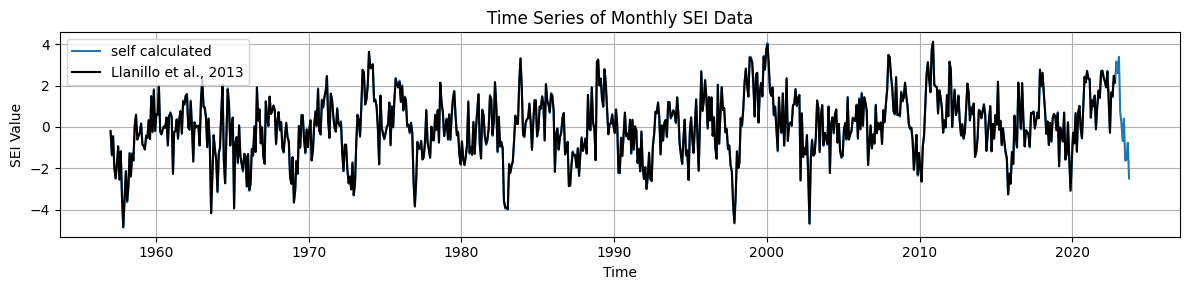

In [ ]:
fig, ax = plt.subplots(figsize = (12,3))
# Plot the time series
ax.plot(SEI_df_all_stacked.index, SEI_df_all_stacked['SEI Value'], label = "self calculated") #SEI value of every month
ax.plot(SEI_df_all_stacked.index, SEI_df_all_stacked['SEI Value Pedro'], label = "Llanillo et al., 2013", c = "k") #SEI value of every month
# Customize the plot
ax.grid()
ax.set_title('Time Series of Monthly SEI Data')
ax.set_xlabel('Time')
ax.set_ylabel('SEI Value')
ax.legend()
fig.tight_layout()

But here we now have only the stacked data frame version with the consecutive months. We may still want a yearly average. Because of own SEI value covers more recent dates, we just use this time series.

The specifics of the following command can be found at [Stackoverflow: find annual average](https://stackoverflow.com/questions/45205423/find-annual-average-of-pandas-dataframe-with-date-column) and
[pandas-docs: anchored offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).



In [ ]:
SEI_df_year_avrg = SEI_df_all_stacked['SEI Value'].groupby(pd.Grouper(freq='A-JUN')).mean()
SEI_df_year_avrg = pd.DataFrame(SEI_df_year_avrg)
SEI_df_year_avrg.head()

,SEI Value
time,
1957-06-30,-1.384499
1958-06-30,-2.508468
1959-06-30,-0.485426
1960-06-30,0.437804
1961-06-30,-0.132170


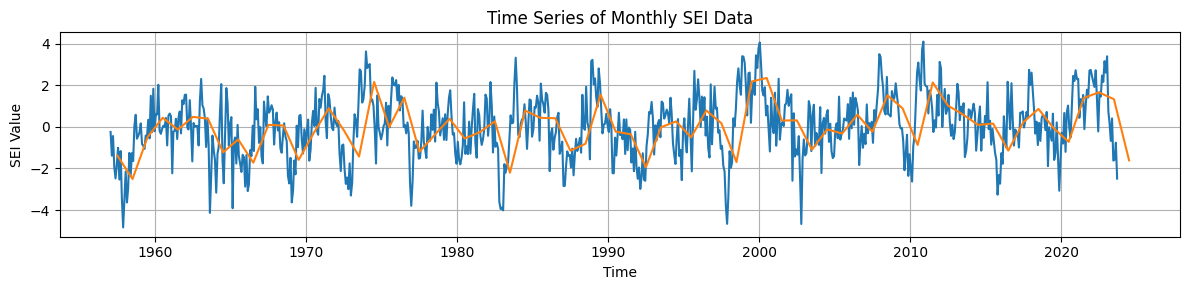

In [ ]:
fig, ax = plt.subplots(figsize = (12,3))
# Plot the time series
ax.plot(SEI_df_all_stacked.index, SEI_df_all_stacked['SEI Value']) #SEI value of every month
ax.plot(SEI_df_year_avrg.index, SEI_df_year_avrg['SEI Value']) #yearly average, timestamped in the middle of each year
# Customize the plot
ax.grid()
ax.set_title('Time Series of Monthly SEI Data')
ax.set_xlabel('Time')
ax.set_ylabel(SEI_df_all_stacked['SEI Value'].name)
fig.tight_layout()

The monthly average over all years is also not as simple as before. See also [statology: pandas group by month](https://www.statology.org/pandas-group-by-month/).

In [ ]:
SEI_df_month_avrg =  SEI_df_all_stacked['SEI Value'].groupby(SEI_df_all_stacked.index.month).mean()
SEI_df_month_avrg = pd.DataFrame(SEI_df_month_avrg)
SEI_df_month_avrg.head()

,SEI Value
time,
1,0.264403
2,-0.142486
3,0.007118
4,0.079224
5,-0.057023


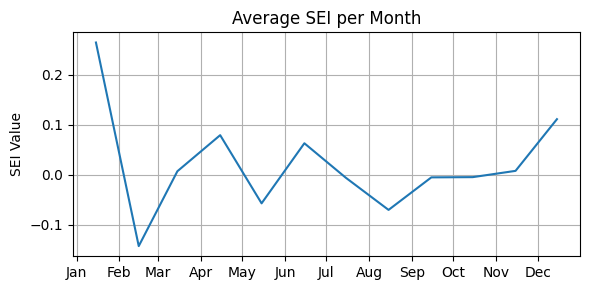

In [ ]:
fig, ax = plt.subplots(figsize = (6,3))
# Plot the time series
ax.plot(pd.to_datetime(SEI_df_month_avrg.index, format = "%m") + pd.offsets.DateOffset(days=14),SEI_df_month_avrg['SEI Value']) #monthly average across time, timestamped in the middle of each month
# Customize the plot
ax.grid()
ax.set_title('Average SEI per Month')
#ax.set_xlabel('Time')
ax.set_ylabel('SEI Value')
fig.tight_layout()

# Format x-axis to display only the month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

## Comparison

At the end, we can plot all 3 climate modes together

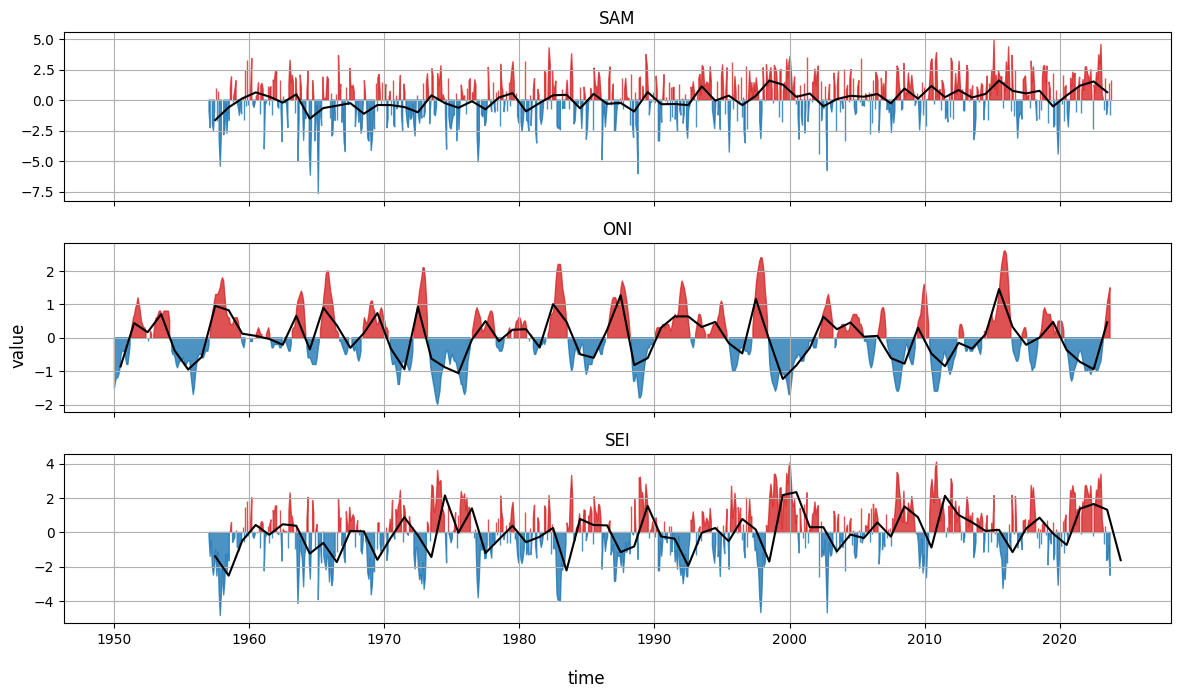

In [316]:
fig, ax = plt.subplots(nrows = 3, sharex = True, figsize = (12,7))

#ax[0].plot(SAM_df_stacked.index, SAM_df_stacked['SAM Value']) #SAM value of every month
ax[0].plot(pd.to_datetime(SAM_df.index, format='%Y') + pd.offsets.DateOffset(months=6), SAM_df.mean(axis = 'columns'), c= "k")
ax[0].fill_between(SAM_df_stacked.index, SAM_df_stacked['SAM Value'], where=(SAM_df_stacked['SAM Value'] > 0), color='tab:red', alpha=0.8)
ax[0].fill_between(SAM_df_stacked.index, SAM_df_stacked['SAM Value'], where=(SAM_df_stacked['SAM Value'] < 0), color='tab:blue', alpha=0.8)
ax[0].set_title('SAM')
ax[0].grid()

#ax[1].plot(ONI_df_stacked.index, ONI_df_stacked['ONI Value']) #ONI value of every month
ax[1].plot(pd.to_datetime(ONI_df.index, format='%Y') + pd.offsets.DateOffset(months=6), ONI_df.mean(axis = 'columns'), c= "k")
ax[1].fill_between(ONI_df_stacked.index, ONI_df_stacked['ONI Value'], where=(ONI_df_stacked['ONI Value'] > 0), color='tab:red', alpha=0.8)
ax[1].fill_between(ONI_df_stacked.index, ONI_df_stacked['ONI Value'], where=(ONI_df_stacked['ONI Value'] < 0), color='tab:blue', alpha=0.8)
ax[1].set_title('ONI')
ax[1].grid()

#ax[2].plot(SEI_df_all_stacked.index, SEI_df_all_stacked['SEI Value']) #SEI value of every month
ax[2].plot(SEI_df_year_avrg.index, SEI_df_year_avrg['SEI Value'], c= "k") #yearly average, timestamped in the middle of each year
ax[2].fill_between(SEI_df_all_stacked.index, SEI_df_all_stacked['SEI Value'], where=(SEI_df_all_stacked['SEI Value'] > 0), color='tab:red', alpha=0.8)
ax[2].fill_between(SEI_df_all_stacked.index, SEI_df_all_stacked['SEI Value'], where=(SEI_df_all_stacked['SEI Value'] < 0), color='tab:blue', alpha=0.8)
ax[2].set_title('SEI')
ax[2].grid()

fig.supxlabel('time')
fig.supylabel('value')
fig.tight_layout()